# 获取数据

In [1164]:
import tushare as ts
token = 'f484f317c5f86cee18655a75fde19201dff7975219dce79626999828'
ts.set_token(token)
pro = ts.pro_api()

## 获取沪深300成分股

In [1165]:
indexs = pro.index_basic(market='SSE')

In [1166]:
index_stocks = pro.index_weight(index_code='000300.SH',start_date='20050501', end_date='20220401')

In [1167]:
index_stocks.to_csv("..\data\index\CSI300_index_weight.csv")

In [1168]:
len(index_stocks.con_code.unique())

328

In [ ]:
import pandas as pd
stockDF = pd.DataFrame(data = None, columns=['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close',
       'change', 'pct_chg', 'vol', 'amount'])

ts_code_list = list(index_stocks.con_code.unique())

count = 0
for ts_code in ts_code_list:
    stock = ts.pro_bar(ts_code=ts_code, adj='qfq', start_date='20050501', end_date='20220401')
    stockDF = pd.concat([stockDF,stock],axis=0)
    
    count = count + 1
    print("num:{},process:{:.2%}".format(count,count/len(index_stocks.con_code.unique())))

In [ ]:
stockDF.to_csv(("..\data\pro_bar_CSI300.csv"))

In [1169]:
stockDF = pd.read_csv("..\data\pro_bar_CSI300.csv")

In [1170]:
stockDF.shape

(880675, 12)

In [1171]:
stockDF

,Unnamed: 0,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,0,603195.SH,20220401,127.5000,131.4800,126.7100,130.3000,128.4200,1.8800,1.4639,5229.52,67953.423
1,1,603195.SH,20220331,128.0000,130.5800,127.0400,128.4200,128.7000,-0.2800,-0.2176,4233.75,54681.727
2,2,603195.SH,20220330,125.0000,128.9000,124.6100,128.7000,125.0000,3.7000,2.9600,5660.96,71962.084
3,3,603195.SH,20220329,126.1700,126.8900,124.3200,125.0000,125.7300,-0.7300,-0.5806,4576.57,57269.427
4,4,603195.SH,20220328,127.1700,127.1700,124.1300,125.7300,128.1500,-2.4200,-1.8884,4157.36,52200.561
...,...,...,...,...,...,...,...,...,...,...,...,...
880670,3905,600340.SH,20050513,0.1566,0.1620,0.1566,0.1620,0.1578,0.0042,2.6616,2838.20,1079.664
880671,3906,600340.SH,20050512,0.1591,0.1603,0.1549,0.1578,0.1582,-0.0004,-0.2528,1591.98,596.763
880672,3907,600340.SH,20050511,0.1549,0.1612,0.1540,0.1582,0.1582,0.0000,0.0000,3350.98,1262.717
880673,3908,600340.SH,20050510,0.1633,0.1666,0.1499,0.1582,0.1649,-0.0067,-4.0631,5121.00,1931.666


## 获取沪深300指数数据

In [1172]:
# 沪深指数收盘价
market_close = pro.index_daily(ts_code='000300.SH', start_date='20050501', end_date='20220401')

In [1173]:
market_close.to_csv(("..\data\index\market300.csv"))

In [1174]:
market_close = pd.read_csv("..\data\index\market300.csv")

In [1175]:
market_close.rename(columns={'trade_date':"date","ts_code":"code"}, inplace = True)

In [1176]:
market_close

,Unnamed: 0,code,date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,0,000300.SH,20220401,4276.1580,4198.8191,4290.6710,4190.0835,4222.5968,53.5612,1.2684,133803053.0,2.447589e+08
1,1,000300.SH,20220331,4222.5968,4234.7159,4247.3602,4214.5352,4254.0989,-31.5021,-0.7405,134029185.0,2.388772e+08
2,2,000300.SH,20220330,4254.0989,4162.1666,4254.0989,4160.7351,4134.1441,119.9548,2.9016,138346024.0,2.688692e+08
3,3,000300.SH,20220329,4134.1441,4155.4182,4177.2134,4124.7179,4148.4663,-14.3222,-0.3452,100266972.0,1.994639e+08
4,4,000300.SH,20220328,4148.4663,4128.8379,4174.1206,4091.2978,4174.5742,-26.1079,-0.6254,118449021.0,2.134690e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
4109,4109,000300.SH,20050513,887.5430,883.5050,898.5050,875.5760,885.8200,1.7230,0.1945,11244906.0,6.228420e+06
4110,4110,000300.SH,20050512,885.8200,899.9680,900.0630,883.5110,901.8510,-16.0310,-1.7776,10228720.0,6.107327e+06
4111,4111,000300.SH,20050511,901.8510,911.8380,917.2230,900.4380,913.0760,-11.2250,-1.2294,9042047.0,5.128333e+06
4112,4112,000300.SH,20050510,913.0760,905.5430,913.3880,892.3130,909.1740,3.9020,0.4292,10494331.0,5.960911e+06


## 获取基本面因子数据

### 读取每日行情指标

In [ ]:
import time
import random
Daily_basic = pd.DataFrame(data = None, columns=['ts_code', 'trade_date', 'close', 'turnover_rate', 'turnover_rate_f',
       'volume_ratio', 'pe', 'pe_ttm', 'pb', 'ps', 'ps_ttm', 'dv_ratio',
       'dv_ttm', 'total_share', 'float_share', 'free_share', 'total_mv',
       'circ_mv'])

count = 0
for ts_code in ts_code_list:
    stock = pro.daily_basic(ts_code=ts_code, start_date='20050501', end_date='20220401')
    Daily_basic = pd.concat([Daily_basic,stock],axis=0)
    
    count = count + 1
    print("num:{},process:{:.2%}".format(count,count/len(ts_code_list)))
    if count%10==0:
        t = random.randint(1,10)
        time.sleep(t)

In [ ]:
Daily_basic.to_csv(("..\data\daily_basic_CSI300.csv"))

In [1177]:
Daily_basic = pd.read_csv("..\data\daily_basic_CSI300.csv")
Daily_basic.shape

(880368, 19)

In [1178]:
Daily_basic.rename(columns={'trade_date':"date","ts_code":"code","Unnamed: 0":"sort"}, inplace = True)

In [1179]:
Daily_basic = Daily_basic.sort_values(by=['code','date'],ascending = True)

In [1180]:
Daily_basic

,sort,code,date,close,turnover_rate,turnover_rate_f,volume_ratio,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv
798487,3967,000001.SZ,20050509,6.09,0.6878,0.8635,0.62,40.8941,51.6269,2.4490,2.2471,2.2207,0.0,NaN,194582.2149,140936.1965,112263.7794,1.185006e+06,8.583014e+05
798486,3966,000001.SZ,20050510,6.31,0.7692,0.9657,0.75,42.3714,53.4919,2.5374,2.3282,2.3009,0.0,NaN,194582.2149,140936.1965,112263.7794,1.227814e+06,8.893074e+05
798485,3965,000001.SZ,20050511,6.19,0.7583,0.9519,0.78,41.5656,52.4746,2.4892,2.2840,2.2572,0.0,NaN,194582.2149,140936.1965,112263.7794,1.204464e+06,8.723951e+05
798484,3964,000001.SZ,20050512,6.19,0.5634,0.7072,0.58,41.5656,52.4746,2.4892,2.2840,2.2572,0.0,NaN,194582.2149,140936.1965,112263.7794,1.204464e+06,8.723951e+05
798483,3963,000001.SZ,20050513,6.02,0.7910,0.9930,0.89,40.4240,51.0335,2.4208,2.2212,2.1952,0.0,NaN,194582.2149,140936.1965,112263.7794,1.171385e+06,8.484359e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394818,4,688981.SH,20220328,46.45,0.4220,0.4724,0.66,84.7461,34.2066,3.3622,13.3649,10.3041,NaN,NaN,790405.1314,187103.8200,167110.9225,3.671432e+07,8.690972e+06
394817,3,688981.SH,20220329,46.16,0.3867,0.4330,0.68,84.2171,33.9931,3.3412,13.2815,10.2398,NaN,NaN,790405.1314,187103.8200,167110.9225,3.648510e+07,8.636712e+06
394816,2,688981.SH,20220330,46.60,0.4893,0.5478,0.88,85.0198,34.3171,3.3730,13.4081,10.3374,NaN,NaN,790405.1314,187103.8200,167110.9225,3.683288e+07,8.719038e+06
394815,1,688981.SH,20220331,46.09,0.6804,0.7618,1.42,33.9415,33.9415,3.3361,10.2243,10.2243,NaN,NaN,790405.1314,187103.8200,167110.9225,3.642977e+07,8.623615e+06


### 读取现金流量表

In [ ]:
Cash_flow = pd.DataFrame(data = None, columns=['ts_code','end_date','n_cashflow_act'])

count = 0
for ts_code in ts_code_list:
    stock = pro.cashflow(ts_code=ts_code, start_date='20050501', end_date='20220401')
    Cash_flow = pd.concat([Cash_flow,stock],axis=0)
    
    count = count + 1
    print("num:{},process:{:.2%}".format(count,count/len(ts_code_list)))
    if count%10==0:
        t = random.randint(1,10)
        time.sleep(t)

In [ ]:
Cash_flow = Cash_flow.loc[:,['ts_code','end_date','n_cashflow_act']]

In [ ]:
Cash_flow.to_csv(("..\data\cash_flow_CSI300.csv"))

In [1181]:
Cash_flow = pd.read_csv("..\data\cash_flow_CSI300.csv")
Cash_flow.shape

(17561, 4)

In [1182]:
Cash_flow.rename(columns={'end_date':"date","ts_code":"code","Unnamed: 0":"sort"}, inplace = True)

In [1183]:
Cash_flow['str_date'] = [str(x) for x in Cash_flow['date']]

In [1184]:
Cash_flow['yearmonth'] = [int(x[0:6]) for x in Cash_flow['str_date']]

In [1185]:
Cash_flow.drop(['sort','str_date'],axis=1,inplace=True)

In [1186]:
Cash_flow

,code,date,n_cashflow_act,yearmonth
0,603195.SH,20210930,2.173594e+09,202109
1,603195.SH,20210630,1.591603e+09,202106
2,603195.SH,20210331,3.559434e+08,202103
3,603195.SH,20201231,3.437203e+09,202012
4,603195.SH,20200930,2.401877e+09,202009
...,...,...,...,...
17556,600340.SH,20061231,3.371271e+07,200612
17557,600340.SH,20060930,3.402341e+07,200609
17558,600340.SH,20060630,2.580653e+07,200606
17559,600340.SH,20060331,5.411601e+06,200603


### 读取财务指标数据表

In [ ]:
Fina_indicator = pd.DataFrame(data = None, columns=['ts_code','end_date','debt_to_assets','nca_to_assets','ebit_to_interest','op_to_ebt',
                                                    'ocf_to_profit','roe','roa','roic','op_of_gr','netprofit_margin','grossprofit_margin',
                                                   'netprofit_yoy','op_yoy','tr_yoy','roe_yoy','assets_yoy','equity_yoy','ocf_yoy','inv_turn',
                                                   'ar_turn','ca_turn','fa_turn'])

count = 0
for ts_code in ts_code_list:
    stock = pro.query('fina_indicator',ts_code=ts_code, start_date='20050501', end_date='20220401')
    Fina_indicator = pd.concat([Fina_indicator,stock],axis=0)
    
    count = count + 1
    print("num:{},process:{:.2%}".format(count,count/len(ts_code_list)))
    if count%10==0:
        t = random.randint(1,10)
        time.sleep(t)

In [ ]:
Fina_indicator = Fina_indicator.loc[:,['ts_code','end_date','debt_to_assets','nca_to_assets','ebit_to_interest','op_to_ebt','ocf_to_profit',
                                       'roe','roa','roic','op_of_gr','netprofit_margin','grossprofit_margin','netprofit_yoy','op_yoy',
                                       'tr_yoy','roe_yoy','assets_yoy','equity_yoy','ocf_yoy','inv_turn','ar_turn','ca_turn','fa_turn']]

In [ ]:
Fina_indicator.to_csv(("fina_indicator_CSI300.csv"))

In [1187]:
Fina_indicator = pd.read_csv("fina_indicator_CSI300.csv")
Fina_indicator.shape

(19375, 25)

In [1188]:
Fina_indicator.rename(columns={'end_date':"date","ts_code":"code","Unnamed: 0":"sort"}, inplace = True)

In [1189]:
Fina_indicator['str_date'] = [str(x) for x in Fina_indicator['date']]

In [1190]:
Fina_indicator['yearmonth'] = [int(x[0:6]) for x in Fina_indicator['str_date']]

In [1191]:
Fina_indicator.drop(['sort','date','str_date'],axis=1,inplace=True)

In [1192]:
Fina_indicator

,code,debt_to_assets,nca_to_assets,ebit_to_interest,op_to_ebt,ocf_to_profit,roe,roa,roic,op_of_gr,...,tr_yoy,roe_yoy,assets_yoy,equity_yoy,ocf_yoy,inv_turn,ar_turn,ca_turn,fa_turn,yearmonth
0,603195.SH,30.5362,15.9082,NaN,NaN,NaN,5.7878,4.6228,4.9240,25.0388,...,19.5841,-9.1192,6.3329,16.2890,21.8301,NaN,12.9336,0.2272,2.0902,202203
1,603195.SH,30.4910,14.3270,NaN,NaN,NaN,27.9530,23.1864,24.9066,29.4815,...,23.2192,2.1001,24.4129,17.7114,-12.3029,NaN,61.4349,1.0419,9.2760,202112
2,603195.SH,30.4910,14.3270,NaN,NaN,NaN,27.9530,23.1864,24.9066,29.4815,...,23.2192,2.1001,24.4129,17.7114,-12.3029,NaN,61.4349,1.0419,9.2760,202112
3,603195.SH,31.3963,14.2020,NaN,NaN,NaN,22.8779,19.0731,20.1774,33.0899,...,26.1013,13.9174,18.9580,21.1270,-9.5044,NaN,53.5823,0.7765,7.7828,202109
4,603195.SH,31.3963,14.2020,NaN,NaN,NaN,22.8779,19.0731,20.1774,33.0899,...,26.1013,13.9174,18.9580,21.1270,-9.5044,NaN,53.5823,0.7765,7.7828,202109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19370,600340.SH,26.1365,39.2442,NaN,NaN,NaN,-0.6235,-0.3751,-0.4530,-2.5365,...,21.1541,-932.6556,-3.4255,-12.1449,554.2605,NaN,0.9841,0.2865,NaN,200606
19371,600340.SH,21.8064,36.0541,NaN,NaN,NaN,-1.0514,-0.7423,-0.8241,-14.1392,...,9.4372,4.9755,-1.7606,-10.7170,349.5112,NaN,0.3110,0.0887,NaN,200603
19372,600340.SH,23.4974,26.9658,NaN,NaN,NaN,-5.9936,-4.5283,-5.1173,-14.1195,...,-10.4001,-321.6915,-5.0882,-10.7658,97.4892,NaN,1.6823,0.4446,1.8886,200512
19373,600340.SH,19.5870,23.3356,NaN,NaN,NaN,-0.9579,-0.5886,-0.8206,-3.6089,...,-17.8194,-141.1594,-4.7569,-5.1001,90.7657,NaN,1.1979,0.2944,1.2783,200509


# 数据处理

### 候选因子如下

#### 价值能力因子
- 市净率 PB
- 市盈率 PE
- 股息率 DP
- 市盈增长比率 PEG
- 市现率 PCF
- 市销率 PS  

#### 偿债能力因子
- 资产负债率 ARL
- 固定资产比例 FACR   

#### 品质能力因子 
- 流通市值 CMC
- 营业利润/毛利润 Operatingprofit/Grossprofit   

#### 成长能力因子
- 净资产收益率增长率 ROEg
- 净利润增长率 Netprofit%
- 营业利润增长率 Operatingprofit%
- 营业总收入同比增长率 Totalrevenue%
- 净资产同比增长率 Equity%
- 经营活动产生的现金流量净额同比增长率Netcashflowsfromoperatingactivities%
- 资产同比增长率 Assets%   

#### 盈利能力因子
- 净资产收益率 ROE
- 资产报酬率 ROA
- 投入资本回报率 ROIC
- 销售净利率 NetProfitMargin
- 销售毛利率 Grossprofitmargin     

#### 运营能力因子
- 固定资产周转率 Fixedassetsturnover
- 流动资产周转率 Currentassetsturnover
- 应收账款周转率 Accountsreceivableturnover

#### 动量因子
- 6个月动量 Momentum6
- 12个月动量 Momentum12
- 换手率 Turnoverrate
- 换手率变动 Turnoverrateg


## 计算缺失候选因子并季度化数据

In [1193]:
#提取日期年份、月份、天数
Daily_basic['str_date'] = [str(x) for x in Daily_basic['date']]

In [1194]:
Daily_basic['year'] = [int(x[0:4]) for x in Daily_basic['str_date']]

In [1195]:
Daily_basic['month'] = [int(x[4:6]) for x in Daily_basic['str_date']]

In [1196]:
Daily_basic['yearmonth'] = [int(x[0:6]) for x in Daily_basic['str_date']]

In [1197]:
Daily_basic['day'] = [int(x[6:8]) for x in Daily_basic['str_date']]

In [1198]:
#季度指针
Daily_basic.loc[(Daily_basic['month'].isin([1,2,3])) ,'quarter'] = 1
Daily_basic.loc[(Daily_basic['month'].isin([4,5,6])) ,'quarter'] = 2
Daily_basic.loc[(Daily_basic['month'].isin([7,8,9])) ,'quarter'] = 3
Daily_basic.loc[(Daily_basic['month'].isin([10,11,12])) ,'quarter'] = 4

In [1199]:
Daily_basic

,sort,code,date,close,turnover_rate,turnover_rate_f,volume_ratio,pe,pe_ttm,pb,...,float_share,free_share,total_mv,circ_mv,str_date,year,month,yearmonth,day,quarter
798487,3967,000001.SZ,20050509,6.09,0.6878,0.8635,0.62,40.8941,51.6269,2.4490,...,140936.1965,112263.7794,1.185006e+06,8.583014e+05,20050509,2005,5,200505,9,2.0
798486,3966,000001.SZ,20050510,6.31,0.7692,0.9657,0.75,42.3714,53.4919,2.5374,...,140936.1965,112263.7794,1.227814e+06,8.893074e+05,20050510,2005,5,200505,10,2.0
798485,3965,000001.SZ,20050511,6.19,0.7583,0.9519,0.78,41.5656,52.4746,2.4892,...,140936.1965,112263.7794,1.204464e+06,8.723951e+05,20050511,2005,5,200505,11,2.0
798484,3964,000001.SZ,20050512,6.19,0.5634,0.7072,0.58,41.5656,52.4746,2.4892,...,140936.1965,112263.7794,1.204464e+06,8.723951e+05,20050512,2005,5,200505,12,2.0
798483,3963,000001.SZ,20050513,6.02,0.7910,0.9930,0.89,40.4240,51.0335,2.4208,...,140936.1965,112263.7794,1.171385e+06,8.484359e+05,20050513,2005,5,200505,13,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394818,4,688981.SH,20220328,46.45,0.4220,0.4724,0.66,84.7461,34.2066,3.3622,...,187103.8200,167110.9225,3.671432e+07,8.690972e+06,20220328,2022,3,202203,28,1.0
394817,3,688981.SH,20220329,46.16,0.3867,0.4330,0.68,84.2171,33.9931,3.3412,...,187103.8200,167110.9225,3.648510e+07,8.636712e+06,20220329,2022,3,202203,29,1.0
394816,2,688981.SH,20220330,46.60,0.4893,0.5478,0.88,85.0198,34.3171,3.3730,...,187103.8200,167110.9225,3.683288e+07,8.719038e+06,20220330,2022,3,202203,30,1.0
394815,1,688981.SH,20220331,46.09,0.6804,0.7618,1.42,33.9415,33.9415,3.3361,...,187103.8200,167110.9225,3.642977e+07,8.623615e+06,20220331,2022,3,202203,31,1.0


In [1200]:
#计算季度换手率
turnover = Daily_basic.groupby(by=['code','year','quarter'], as_index=False)['turnover_rate'].sum()

In [1201]:
turnover.rename(columns={'turnover_rate':"turnover_q"}, inplace = True)

In [1202]:
#计算换手率变动
turnover['1turnover_q'] = turnover.groupby('code')['turnover_q'].shift(1)
turnover['trc'] = (turnover['turnover_q']-turnover['1turnover_q'])/turnover['1turnover_q']

In [1203]:
turnover

,code,year,quarter,turnover_q,1turnover_q,trc
0,000001.SZ,2005,2.0,24.6232,NaN,NaN
1,000001.SZ,2005,3.0,36.9640,24.6232,0.501186
2,000001.SZ,2005,4.0,25.1973,36.9640,-0.318329
3,000001.SZ,2006,1.0,50.5396,25.1973,1.005755
4,000001.SZ,2006,2.0,96.1819,50.5396,0.903100
...,...,...,...,...,...,...
15338,688981.SH,2021,2.0,136.1226,179.1996,-0.240386
15339,688981.SH,2021,3.0,198.9480,136.1226,0.461535
15340,688981.SH,2021,4.0,86.9355,198.9480,-0.563024
15341,688981.SH,2022,1.0,42.9186,86.9355,-0.506317


In [1204]:
quater_basic = Daily_basic[Daily_basic['month'].isin([3,6,9,12])]

In [1205]:
quater_basic

,sort,code,date,close,turnover_rate,turnover_rate_f,volume_ratio,pe,pe_ttm,pb,...,float_share,free_share,total_mv,circ_mv,str_date,year,month,yearmonth,day,quarter
798470,3950,000001.SZ,20050601,5.95,0.2738,0.3438,0.71,39.9540,50.4401,2.3927,...,140936.1965,112263.7794,1.157764e+06,8.385704e+05,20050601,2005,6,200506,1,2.0
798469,3949,000001.SZ,20050602,5.78,0.5589,0.7016,1.55,38.8125,48.9989,2.3243,...,140936.1965,112263.7794,1.124685e+06,8.146112e+05,20050602,2005,6,200506,2,2.0
798468,3948,000001.SZ,20050603,5.83,0.4715,0.5919,1.15,39.1482,49.4228,2.3444,...,140936.1965,112263.7794,1.134414e+06,8.216580e+05,20050603,2005,6,200506,3,2.0
798467,3947,000001.SZ,20050606,5.94,0.3521,0.4420,0.82,39.8869,50.3553,2.3887,...,140936.1965,112263.7794,1.155818e+06,8.371610e+05,20050606,2005,6,200506,6,2.0
798466,3946,000001.SZ,20050607,5.94,0.4943,0.6205,1.19,39.8869,50.3553,2.3887,...,140936.1965,112263.7794,1.155818e+06,8.371610e+05,20050607,2005,6,200506,7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394819,5,688981.SH,20220325,46.76,0.5018,0.5618,0.77,85.3117,34.4349,3.3846,...,187103.8200,167110.9225,3.695934e+07,8.748975e+06,20220325,2022,3,202203,25,1.0
394818,4,688981.SH,20220328,46.45,0.4220,0.4724,0.66,84.7461,34.2066,3.3622,...,187103.8200,167110.9225,3.671432e+07,8.690972e+06,20220328,2022,3,202203,28,1.0
394817,3,688981.SH,20220329,46.16,0.3867,0.4330,0.68,84.2171,33.9931,3.3412,...,187103.8200,167110.9225,3.648510e+07,8.636712e+06,20220329,2022,3,202203,29,1.0
394816,2,688981.SH,20220330,46.60,0.4893,0.5478,0.88,85.0198,34.3171,3.3730,...,187103.8200,167110.9225,3.683288e+07,8.719038e+06,20220330,2022,3,202203,30,1.0


In [1206]:
#提取每季度最后一天
a= quater_basic.groupby(by=['code','yearmonth'], as_index=False)['day'].max()

In [1207]:
a

,code,yearmonth,day
0,000001.SZ,200506,30
1,000001.SZ,200509,27
2,000001.SZ,200512,30
3,000001.SZ,200603,31
4,000001.SZ,200606,30
...,...,...,...
14892,688981.SH,202103,31
14893,688981.SH,202106,30
14894,688981.SH,202109,30
14895,688981.SH,202112,31


In [1208]:
quaterly_basic = pd.merge(a,quater_basic)

In [1209]:
#计算季度涨幅、6个月动量，12个月动量
quaterly_basic['1close'] = quaterly_basic.groupby('code')['close'].shift(1)
quaterly_basic['2close'] = quaterly_basic.groupby('code')['close'].shift(2)
quaterly_basic['4close'] = quaterly_basic.groupby('code')['close'].shift(4)
quaterly_basic['change'] = (quaterly_basic['close'] - quaterly_basic['1close'])/quaterly_basic['1close']
quaterly_basic['mtm6'] = (quaterly_basic['close'] - quaterly_basic['2close'])/quaterly_basic['2close']
quaterly_basic['mtm12'] = (quaterly_basic['close'] - quaterly_basic['4close'])/quaterly_basic['4close']

In [1210]:
quaterly_basic

,code,yearmonth,day,sort,date,close,turnover_rate,turnover_rate_f,volume_ratio,pe,...,str_date,year,month,quarter,1close,2close,4close,change,mtm6,mtm12
0,000001.SZ,200506,30,3930,20050630,5.93,0.7880,0.9892,1.45,39.8197,...,20050630,2005,6,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,000001.SZ,200509,27,3867,20050927,5.76,0.3570,0.4482,0.68,38.6782,...,20050927,2005,9,3.0,5.93,NaN,NaN,-0.028668,NaN,NaN
2,000001.SZ,200512,30,3816,20051230,6.14,0.4001,0.5023,0.68,41.2298,...,20051230,2005,12,4.0,5.76,5.93,NaN,0.065972,0.035413,NaN
3,000001.SZ,200603,31,3760,20060331,6.37,0.7354,0.9233,0.91,42.7743,...,20060331,2006,3,1.0,6.14,5.76,NaN,0.037459,0.105903,NaN
4,000001.SZ,200606,30,3712,20060630,7.56,1.5868,1.9920,0.95,47.2992,...,20060630,2006,6,2.0,6.37,6.14,5.93,0.186813,0.231270,0.274874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14892,688981.SH,202103,31,244,20210331,54.32,0.9655,0.9655,0.63,239.2089,...,20210331,2021,3,1.0,57.75,49.65,NaN,-0.059394,0.094058,NaN
14893,688981.SH,202106,30,184,20210630,61.82,7.1003,7.1003,2.06,112.7454,...,20210630,2021,6,2.0,54.32,57.75,NaN,0.138071,0.070476,NaN
14894,688981.SH,202109,30,120,20210930,55.20,0.9214,0.9214,0.60,100.7023,...,20210930,2021,9,3.0,61.82,54.32,49.65,-0.107085,0.016200,0.111782
14895,688981.SH,202112,31,59,20211231,52.99,0.7647,0.8562,1.12,96.6757,...,20211231,2021,12,4.0,55.20,61.82,57.75,-0.040036,-0.142834,-0.082424


In [1211]:
Data = pd.merge(turnover,quaterly_basic)

In [1212]:
Data.drop(['date'],axis=1,inplace=True)

In [1213]:
Data = pd.merge(Data,Cash_flow)
Data = pd.merge(Data,Fina_indicator)

In [1214]:
Data

,code,year,quarter,turnover_q,1turnover_q,trc,yearmonth,day,sort,close,...,op_yoy,tr_yoy,roe_yoy,assets_yoy,equity_yoy,ocf_yoy,inv_turn,ar_turn,ca_turn,fa_turn
0,000001.SZ,2005,4.0,25.1973,36.9640,-0.318329,200512,30,3816,6.14,...,25.3895,3.1928,-1.1061,8.7467,6.7612,-160.8262,NaN,NaN,NaN,NaN
1,000001.SZ,2006,1.0,50.5396,25.1973,1.005755,200603,31,3760,6.37,...,-66.8307,-18.7231,39.0691,7.7512,8.7903,814.9598,NaN,NaN,NaN,0.6743
2,000001.SZ,2006,2.0,96.1819,50.5396,0.903100,200606,30,3712,7.56,...,114.9458,18.0628,156.9741,9.2204,14.3064,300.6696,NaN,NaN,NaN,NaN
3,000001.SZ,2006,3.0,45.6050,96.1819,-0.525846,200609,29,3654,8.16,...,158.6666,25.7094,101.2705,10.7526,20.7178,257.7883,NaN,NaN,NaN,NaN
4,000001.SZ,2006,4.0,134.1558,45.6050,1.941691,200612,29,3597,14.47,...,200.4834,30.9082,227.0461,17.2053,28.0953,272.9142,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16668,688981.SH,2021,3.0,198.9480,136.1226,0.461535,202109,30,120,55.20,...,127.1391,21.9779,125.7131,5.1140,5.2627,60.7062,NaN,7.0838,0.2646,0.4398
16669,688981.SH,2021,4.0,86.9355,198.9480,-0.563024,202112,31,59,52.99,...,158.8919,29.7041,124.8994,12.3807,10.1593,58.2248,NaN,9.7633,0.3636,0.6102
16670,688981.SH,2021,4.0,86.9355,198.9480,-0.563024,202112,31,59,52.99,...,158.8919,29.7041,124.8994,12.3807,NaN,58.2248,NaN,9.7633,0.3636,0.6102
16671,688981.SH,2021,4.0,86.9355,198.9480,-0.563024,202112,31,59,52.99,...,158.8919,29.7041,124.8994,12.3807,10.1593,58.2248,NaN,9.7633,0.3636,0.6102


In [1215]:
#计算peg、pcf
Data['peg'] = Data['pe_ttm']/Data['netprofit_yoy']
Data['pcf'] = Data['total_mv']/Data['n_cashflow_act']

In [1216]:
data = Data.loc[:,['code','date','yearmonth','close','change','pb','pe','dv_ratio','ps','roe_yoy','op_yoy','equity_yoy','assets_yoy','roe','roic','mtm6','mtm12','turnover_q','peg','pcf','debt_to_assets','nca_to_assets','circ_mv','op_of_gr','netprofit_yoy','tr_yoy','ocf_yoy','roa','netprofit_margin','grossprofit_margin','fa_turn','ca_turn','ar_turn','trc']]

In [1217]:
data

,code,date,yearmonth,close,change,pb,pe,dv_ratio,ps,roe_yoy,...,netprofit_yoy,tr_yoy,ocf_yoy,roa,netprofit_margin,grossprofit_margin,fa_turn,ca_turn,ar_turn,trc
0,000001.SZ,20051231,200512,6.14,0.065972,2.3823,41.2298,0.0,2.2655,-1.1061,...,5.5803,3.1928,-160.8262,NaN,5.7060,NaN,NaN,NaN,NaN,-0.318329
1,000001.SZ,20060331,200603,6.37,0.037459,2.4716,42.7743,0.0,2.3504,39.0691,...,55.6032,-18.7231,814.9598,NaN,14.6035,NaN,0.6743,NaN,NaN,1.005755
2,000001.SZ,20060630,200606,7.56,0.186813,2.7945,47.2992,0.0,2.6989,156.9741,...,176.1603,18.0628,300.6696,NaN,14.8682,NaN,NaN,NaN,NaN,0.903100
3,000001.SZ,20060930,200609,8.16,0.079365,2.8394,51.0531,0.0,2.9131,101.2705,...,196.8541,25.7094,257.7883,NaN,17.5359,NaN,NaN,NaN,NaN,-0.525846
4,000001.SZ,20061231,200612,14.47,0.773284,4.6509,90.5317,0.0,5.1657,227.0461,...,318.9307,30.9082,272.9142,NaN,18.2602,NaN,NaN,NaN,NaN,1.941691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16668,688981.SH,20210930,202109,55.20,-0.107085,4.2070,100.7023,NaN,15.8813,125.7131,...,137.5918,21.9779,60.7062,3.8567,29.5704,27.9438,0.4398,0.2646,7.0838,0.461535
16669,688981.SH,20211231,202112,52.99,-0.040036,3.9253,96.6757,NaN,15.2463,124.8994,...,147.7477,29.7041,58.2248,5.0008,31.4407,29.3050,0.6102,0.3636,9.7633,-0.563024
16670,688981.SH,20211231,202112,52.99,-0.040036,3.9253,96.6757,NaN,15.2463,124.8994,...,147.7477,29.7041,58.2248,6.3254,31.4407,29.3050,0.6102,0.3636,9.7633,-0.563024
16671,688981.SH,20211231,202112,52.99,-0.040036,3.9253,96.6757,NaN,15.2463,124.8994,...,147.7477,29.7041,58.2248,5.0008,31.4407,29.3050,0.6102,0.3636,9.7633,-0.563024


## 描述性统计

In [1218]:
describe_data = data.drop(['code','date','yearmonth'],axis=1)

In [1219]:
describe_data.rename(columns={'close':'收盘价','change':'季涨幅','pb':'市净率','pe':'市盈率','dv_ratio':'股息率','ps':'市销率',
                              'roe_yoy':'净资产收益率增长率','op_yoy':'营业利润增长率','equity_yoy':'净资产同比增长率',
                              'assets_yoy':'资产同比增长率','roe':'净资产收益率','roic':'投入资本回报率','mtm6':'6个月动量',
                              'mtm12':'12个月动量','turnover_q':'换手率','peg':'市盈增长比率','pcf':'市现率',
                              'debt_to_assets':'资产负债率','nca_to_assets':'固定资产比例','circ_mv':'流通市值',
                              'op_of_gr':'营业利润/毛利润','netprofit_yoy':'净利润增长率','tr_yoy':'营业总收入同比增长率',
                              'ocf_yoy':'经营活动产生的现金流量净额同比增长率','roa':'资产报酬率','netprofit_margin':'销售净利率 ',
                              'grossprofit_margin':'销售毛利率 ','fa_turn':'固定资产周转率','ca_turn':'流动资产周转率',
                              'ar_turn':'应收账款周转率 ','trc':'换手率变动'}, inplace = True)

In [1220]:
describe = describe_data.describe()
describe_T = pd.DataFrame(describe.values.T,columns=describe.index,index=describe.columns)

In [1221]:
describe_T['偏度'] = describe_data.skew()

In [1222]:
describe_T['峰度'] = describe_data.kurt()

In [1223]:
describe_T = describe_T.round(2)
describe_T

,count,mean,std,min,25%,50%,75%,max,偏度,峰度
收盘价,16673.0,33.45,80.96,1.08,8.44,16.42,32.87,2.056700e+03,14.37,293.44
季涨幅,16437.0,0.04,0.29,-0.77,-0.11,0.00,0.15,5.890000e+00,2.90,28.04
市净率,16661.0,4.97,5.64,0.35,1.74,3.22,6.05,1.153100e+02,4.79,47.46
市盈率,16135.0,81.63,515.82,1.68,16.57,32.28,61.91,2.657013e+04,33.40,1313.86
股息率,15204.0,1.34,1.66,0.00,0.26,0.78,1.81,2.878000e+01,3.55,31.28
市销率,16669.0,16.76,349.52,0.05,1.41,3.15,8.00,2.319378e+04,51.13,2937.92
净资产收益率增长率,16368.0,32.28,866.05,-57621.26,-21.51,0.50,25.58,6.867563e+04,14.55,3669.80
营业利润增长率,16645.0,109.82,3358.83,-56299.85,-5.28,18.71,53.94,3.102152e+05,61.04,5006.79
净资产同比增长率,16299.0,43.80,1222.87,-14833.81,5.74,13.38,26.02,1.537507e+05,121.83,15319.50
资产同比增长率,16663.0,14.75,38.71,-98.53,2.17,8.05,17.59,1.650200e+03,15.23,464.53


In [1224]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None
%matplotlib inline
import seaborn as sns
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

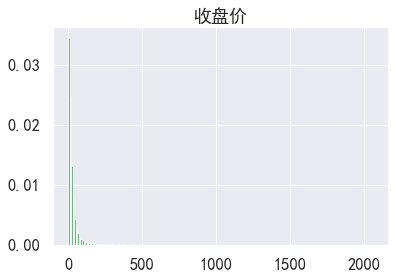

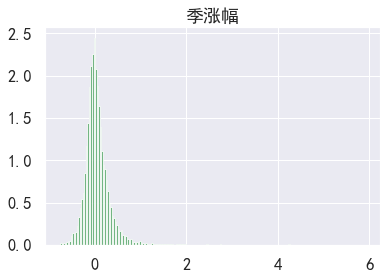

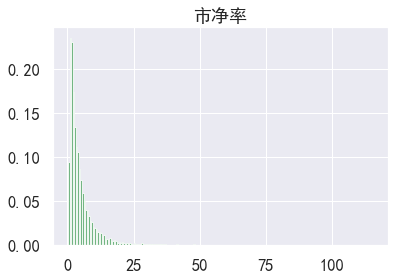

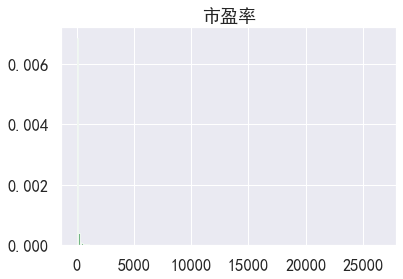

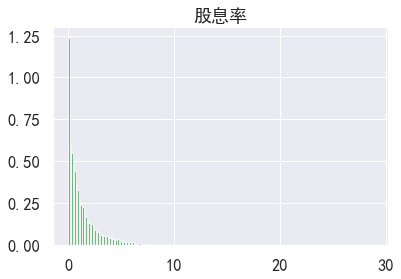

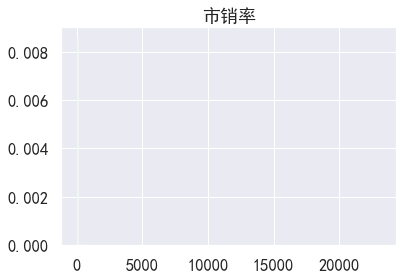

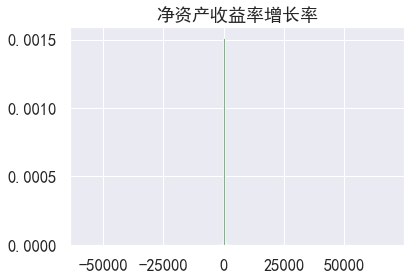

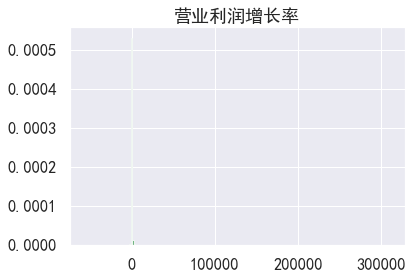

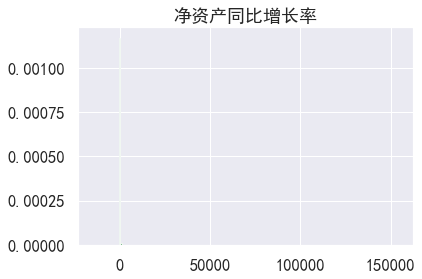

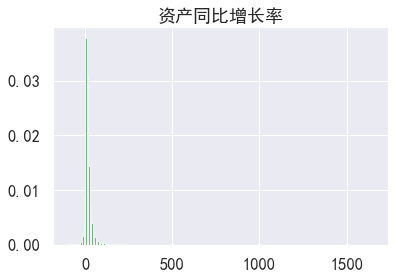

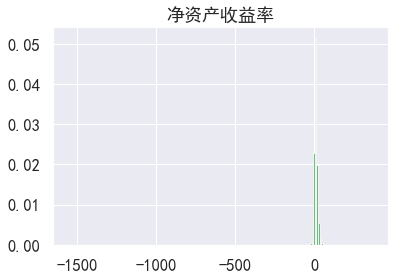

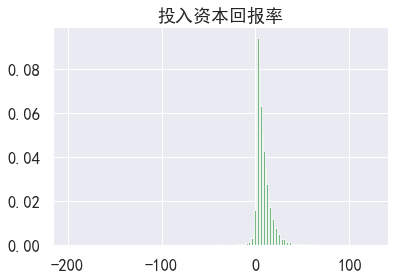

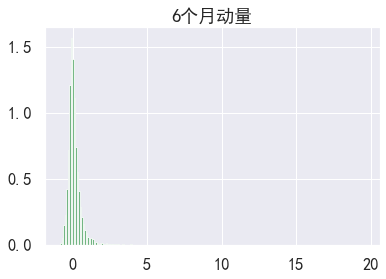

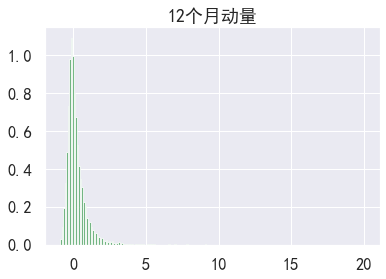

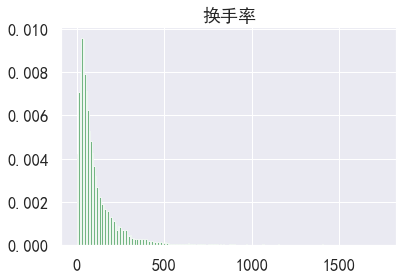

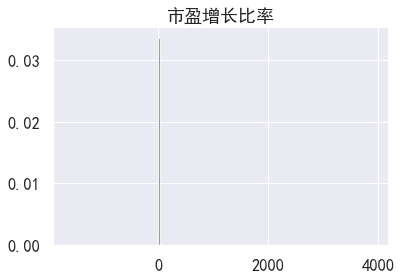

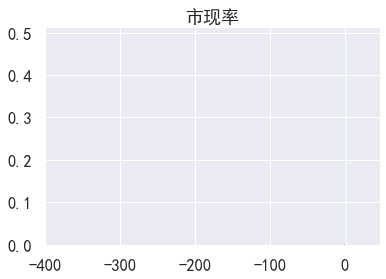

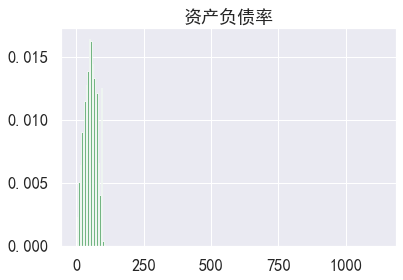

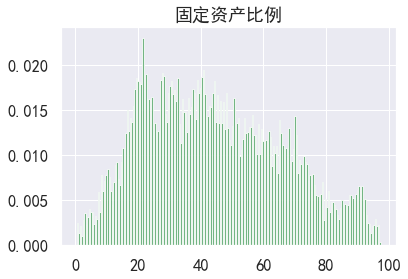

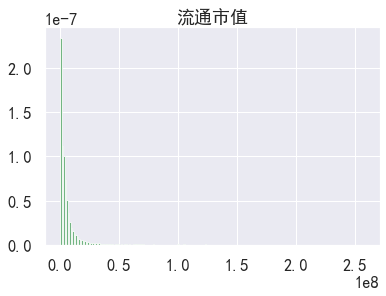

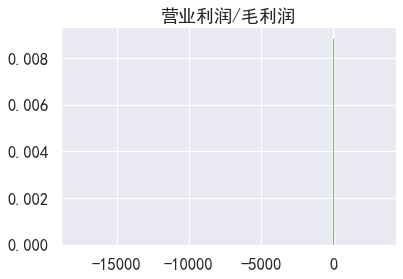

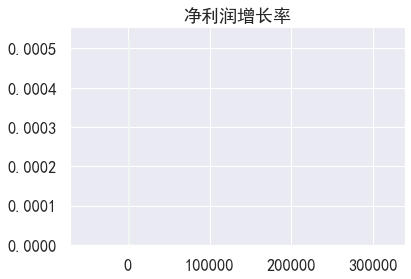

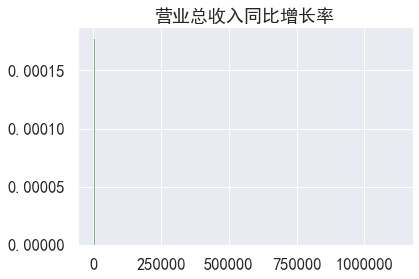

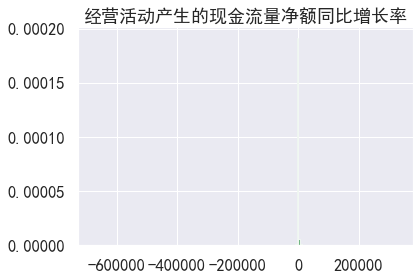

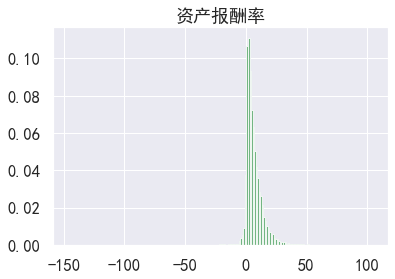

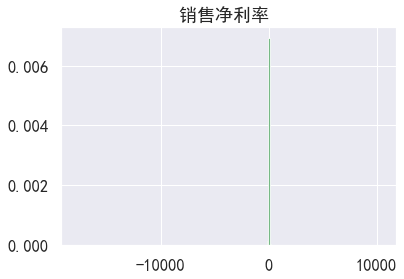

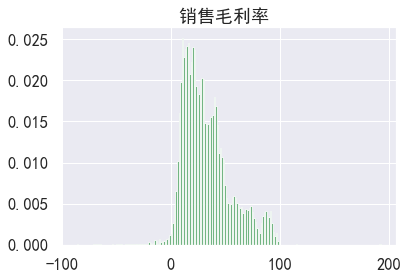

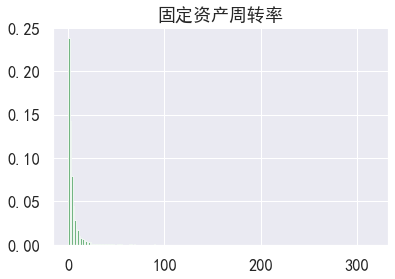

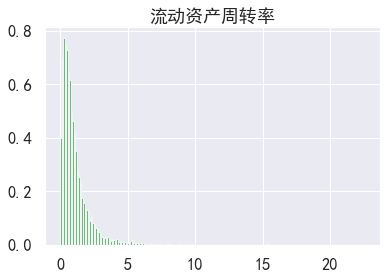

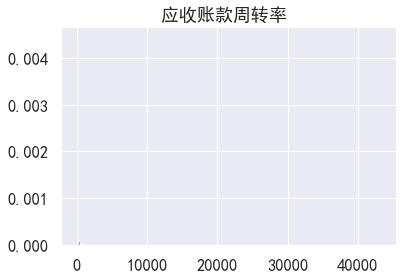

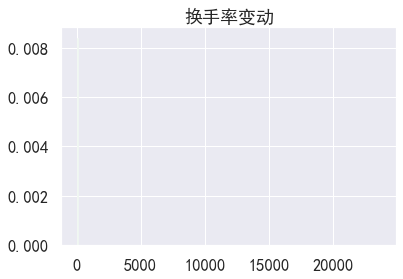

In [1225]:
#绘制频率直方图
for index, row in describe_data.iteritems():
    plt.hist(row,200,facecolor='g',density = True,alpha=0.8)
    plt.title(index)
    plt.show()

# 实证分析

## 筛选候选因子

In [1226]:
import statsmodels.api as sm

In [1227]:
describe_data[np.isnan(describe_data)] = 0
describe_data[np.isinf(describe_data)] = 0

### 对每个候选因子进行回归分析

用沪深 300 中的所有股票涨跌幅对每只股票对应的候选因子进行时间序列回归，得到每只股票涨跌幅对各因子的回归系数 βi后，剔出异常值和缺省值的影响，对有效的所有β值在5%的显著性水平下进行t检验

In [1228]:
OLS = pd.DataFrame()
OLS['回归系数']=''
OLS['t值']=''
OLS['p值']=''
for index, row in describe_data.iteritems():
    X = row
    y = describe_data['季涨幅']
    X = sm.add_constant(X)
    OLS_results = sm.OLS(y,X).fit()
    p = OLS_results.pvalues
    t = OLS_results.tvalues
    coef = OLS_results.params
    s = pd.Series([coef[1],t[1],p[1]])
    s.index = ['回归系数','t值','p值']
    OLS = OLS.append(s,ignore_index=True)
    summary = OLS_results.summary()
    print(coef[1])
    print(summary)

0.00028201790822552015
                            OLS Regression Results                            
Dep. Variable:                    季涨幅   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     108.0
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           3.25e-25
Time:                        22:38:33   Log-Likelihood:                -2651.4
No. Observations:               16673   AIC:                             5307.
Df Residuals:                   16671   BIC:                             5322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0334      0.

-0.00013788110346105677
                            OLS Regression Results                            
Dep. Variable:                    季涨幅   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.187
Date:                Thu, 30 Jun 2022   Prob (F-statistic):             0.0742
Time:                        22:38:33   Log-Likelihood:                -2703.6
No. Observations:               16673   AIC:                             5411.
Df Residuals:                   16671   BIC:                             5427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0501      0

In [1229]:
OLS.index = describe_data.columns
OLS.drop(['收盘价','季涨幅'],axis=0,inplace=True)

In [1230]:
OLS

,回归系数,t值,p值
市净率,9.268035e-03,24.106221,3.087156e-126
市盈率,3.468530e-05,8.003294,1.290466e-15
股息率,-1.771683e-02,-13.203094,1.330836e-39
市销率,2.122743e-05,3.366675,7.625209e-04
净资产收益率增长率,3.884243e-06,1.512226,1.304953e-01
营业利润增长率,2.251961e-06,3.429862,6.053497e-04
净资产同比增长率,1.174318e-05,6.449500,1.153069e-10
资产同比增长率,4.223549e-04,7.428370,1.152580e-13
净资产收益率,3.518611e-04,2.604915,9.197871e-03
投入资本回报率,1.192800e-03,4.526172,6.047695e-06


In [1231]:
#筛选出p值小于0.05的因子
OLS[OLS['p值']<0.05]

,回归系数,t值,p值
市净率,0.009268,24.106221,3.087156e-126
市盈率,0.000035,8.003294,1.290466e-15
股息率,-0.017717,-13.203094,1.330836e-39
市销率,0.000021,3.366675,7.625209e-04
营业利润增长率,0.000002,3.429862,6.053497e-04
净资产同比增长率,0.000012,6.449500,1.153069e-10
资产同比增长率,0.000422,7.428370,1.152580e-13
净资产收益率,0.000352,2.604915,9.197871e-03
投入资本回报率,0.001193,4.526172,6.047695e-06
6个月动量,0.429139,124.831361,0.000000e+00


In [1232]:
OLS[OLS['p值']<0.05].index

Index(['市净率', '市盈率', '股息率', '市销率', '营业利润增长率', '净资产同比增长率', '资产同比增长率', '净资产收益率',
       '投入资本回报率', '6个月动量', '12个月动量', '换手率', '固定资产比例', '资产报酬率', '销售毛利率 ',
       '流动资产周转率', '换手率变动'],
      dtype='object')

In [1233]:
choose_data = data

In [1234]:
choose_data.rename(columns={'close':'收盘价','change':'季涨幅','pb':'市净率','pe':'市盈率','dv_ratio':'股息率','ps':'市销率',
                              'roe_yoy':'净资产收益率增长率','op_yoy':'营业利润增长率','equity_yoy':'净资产同比增长率',
                              'assets_yoy':'资产同比增长率','roe':'净资产收益率','roic':'投入资本回报率','mtm6':'6个月动量',
                              'mtm12':'12个月动量','turnover_q':'换手率','peg':'市盈增长比率','pcf':'市现率',
                              'debt_to_assets':'资产负债率','nca_to_assets':'固定资产比例','circ_mv':'流通市值',
                              'op_of_gr':'营业利润/毛利润','netprofit_yoy':'净利润增长率','tr_yoy':'营业总收入同比增长率',
                              'ocf_yoy':'经营活动产生的现金流量净额同比增长率','roa':'资产报酬率','netprofit_margin':'销售净利率 ',
                              'grossprofit_margin':'销售毛利率 ','fa_turn':'固定资产周转率','ca_turn':'流动资产周转率',
                              'ar_turn':'应收账款周转率 ','trc':'换手率变动'}, inplace = True)

In [1235]:
choose_data = choose_data.loc[:,['code','date','yearmonth','收盘价','季涨幅','市净率', '市盈率', '股息率', '市销率', '营业利润增长率', '净资产同比增长率', '资产同比增长率', '净资产收益率',
       '投入资本回报率', '6个月动量', '12个月动量', '换手率', '固定资产比例', '资产报酬率', '销售毛利率 ',
       '流动资产周转率', '换手率变动']]
choose_data

,code,date,yearmonth,收盘价,季涨幅,市净率,市盈率,股息率,市销率,营业利润增长率,...,净资产收益率,投入资本回报率,6个月动量,12个月动量,换手率,固定资产比例,资产报酬率,销售毛利率,流动资产周转率,换手率变动
0,000001.SZ,20051231,200512,6.14,0.065972,2.3823,41.2298,0.0,2.2655,25.3895,...,6.3868,NaN,0.035413,NaN,25.1973,NaN,NaN,NaN,NaN,-0.318329
1,000001.SZ,20060331,200603,6.37,0.037459,2.4716,42.7743,0.0,2.3504,-66.8307,...,4.5197,NaN,0.105903,NaN,50.5396,NaN,NaN,NaN,NaN,1.005755
2,000001.SZ,20060630,200606,7.56,0.186813,2.7945,47.2992,0.0,2.6989,114.9458,...,8.7094,NaN,0.231270,0.274874,96.1819,NaN,NaN,NaN,NaN,0.903100
3,000001.SZ,20060930,200609,8.16,0.079365,2.8394,51.0531,0.0,2.9131,158.6666,...,16.0293,NaN,0.281005,0.416667,45.6050,NaN,NaN,NaN,NaN,-0.525846
4,000001.SZ,20061231,200612,14.47,0.773284,4.6509,90.5317,0.0,5.1657,200.4834,...,22.6025,NaN,0.914021,1.356678,134.1558,NaN,NaN,NaN,NaN,1.941691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16668,688981.SH,20210930,202109,55.20,-0.107085,4.2070,100.7023,NaN,15.8813,127.1391,...,7.1111,4.2896,0.016200,0.111782,198.9480,56.9237,3.8567,27.9438,0.2646,0.461535
16669,688981.SH,20211231,202112,52.99,-0.040036,3.9253,96.6757,NaN,15.2463,158.8919,...,10.3041,5.4248,-0.142834,-0.082424,86.9355,57.8580,5.0008,29.3050,0.3636,-0.563024
16670,688981.SH,20211231,202112,52.99,-0.040036,3.9253,96.6757,NaN,15.2463,158.8919,...,10.3041,6.8616,-0.142834,-0.082424,86.9355,57.8580,6.3254,29.3050,0.3636,-0.563024
16671,688981.SH,20211231,202112,52.99,-0.040036,3.9253,96.6757,NaN,15.2463,158.8919,...,10.3041,5.4248,-0.142834,-0.082424,86.9355,57.8580,5.0008,29.3050,0.3636,-0.563024


### 基于单个因子筛选股票后的收益表现筛选因子

In [1236]:
dafen = choose_data.groupby(by=['code'], as_index=False).mean()

In [1237]:
dafen

,code,date,yearmonth,收盘价,季涨幅,市净率,市盈率,股息率,市销率,营业利润增长率,...,净资产收益率,投入资本回报率,6个月动量,12个月动量,换手率,固定资产比例,资产报酬率,销售毛利率,流动资产周转率,换手率变动
0,000001.SZ,2.013771e+07,201376.794118,15.442647,0.043811,2.003851,21.171087,0.588000,3.103528,39.527763,...,10.590856,NaN,0.098481,0.232537,57.727475,NaN,NaN,NaN,NaN,0.118534
1,000002.SZ,2.014123e+07,201412.000000,17.336901,0.042649,2.426390,16.001545,2.137248,1.881310,21.631061,...,9.731220,5.495900,0.098846,0.233534,66.004937,9.910077,3.241090,34.046462,0.182872,0.091697
2,000063.SZ,2.013630e+07,201362.724638,27.959855,0.025708,3.306858,31.943348,0.582268,1.199988,51.242784,...,4.416451,3.343543,0.061754,0.114313,98.306465,22.250699,2.512983,32.955319,0.659764,0.131477
3,000066.SZ,2.014120e+07,201411.704225,9.641831,0.056421,3.857146,154.317010,0.966396,1.527144,75.616117,...,3.048328,2.793377,0.139375,0.313188,141.855938,34.309127,2.064604,13.024300,1.189535,0.146211
4,000069.SZ,2.013970e+07,201396.684932,11.331507,0.045075,3.392071,21.456774,1.572303,7.305581,33.790170,...,8.969104,4.778338,0.085796,0.167273,74.552826,39.831590,4.065900,50.101047,0.294415,0.164476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,688363.SH,2.020687e+07,202068.400000,162.988000,0.088739,15.376673,127.462573,NaN,33.883120,22.329053,...,9.955400,9.566993,0.174000,0.506642,224.730967,38.868380,9.657440,78.656160,0.699420,-0.053171
324,688396.SH,2.020575e+07,202057.200000,62.618000,0.189740,6.389540,136.120410,NaN,12.480020,171.248750,...,8.079860,6.443880,0.410190,0.673225,391.412060,32.620020,5.400520,30.638200,0.461490,0.066763
325,688561.SH,2.020878e+07,202087.500000,91.456000,-0.076267,6.527560,NaN,NaN,17.034300,-7.794910,...,-9.702620,-9.562040,-0.130750,-0.172090,161.863500,36.043710,-7.647770,62.183030,0.273320,-0.053055
326,688599.SH,2.020619e+07,202061.636364,26.402727,0.311221,3.635455,56.997664,NaN,2.005582,98.240109,...,5.084391,3.623318,0.695263,1.478671,323.778427,37.800191,2.463836,14.411345,0.688336,-0.135637


针对每一个因子，选择 2005 年 5 月-2022 年 4 月沪深 300成分股在该因子排名靠前的 100 只，对这 100 只股票数据对应的年化收益率进行数据结果分析

In [1238]:
#股息率与季涨幅呈负相关，单独拿出来分析
zheng = dafen.loc[:,['季涨幅','市净率', '市盈率','市销率', '营业利润增长率', '净资产同比增长率', '资产同比增长率', '净资产收益率',
       '投入资本回报率', '6个月动量', '12个月动量', '换手率', '固定资产比例', '资产报酬率', '销售毛利率 ',
       '流动资产周转率', '换手率变动']]
fu = dafen.loc[:,['季涨幅','股息率']]

In [1239]:
yearly_change = pd.DataFrame()
for index, row in zheng.iteritems():
    zheng = zheng.sort_values(by=index,ascending = False)
    choosezheng = zheng[:100]
    quarterchange = choosezheng['季涨幅'].mean()
    yearchange = (quarterchange+1)**4-1
    series = pd.Series({"年化收益率":yearchange},name=index)
    yearly_change = yearly_change.append(series)

In [1240]:
fu = fu.sort_values(by=['股息率'],ascending = True)
choosefu = fu[:100]
quarterchange = choosefu['季涨幅'].mean()
yearchange = (quarterchange+1)**4-1
series = pd.Series({"年化收益率":yearchange},name='股息率')
yearly_change = yearly_change.append(series)

In [1241]:
yearly_change = yearly_change.sort_values(by=["年化收益率"],ascending = False)
yearly_change = yearly_change.drop(['季涨幅'],axis=0)
yearly_change

,年化收益率
6个月动量,0.457626
12个月动量,0.440925
营业利润增长率,0.283908
股息率,0.268701
市盈率,0.265561
净资产收益率,0.258488
市净率,0.255224
投入资本回报率,0.254555
资产报酬率,0.244334
净资产同比增长率,0.243665


- 技术因子6个月动量、12个月动量、换手率、换手率变动中，6个月动量的组合收益最高，达到了45.8%；
- 价值能力因子中，根据股息率筛选出的股票组合年化收益率最高，达到了26.9%；
- 盈利能力因子中，根据净资产收益率筛选出的股票组合年化收益率较投入资本回报率的组合更高，达到了25.8%；
- 成长能力因子中，根据营业利润增长率筛选出的股票组合年化收益率最高，达到了28.4%；
- 根据偿债能力因子固定资产比例与运营能力因子流动资产周转率筛选出的股票组合年化收益率较低。  

因此，从技术因子、价值能力因子、盈利能力因子与成长能力因子四类因子中各选一个因子，最后选择6个月动量、股息率、净资产收益率与营业利润增长率一共4个因子。

## 构建多因子选股模型与投资组合

In [1242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import matplotlib
from sklearn import linear_model
import statsmodels.api as sm
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use("seaborn")

### 获取并处理数据

In [1243]:
daily_basic = Data.loc[:,['code','date','yearmonth','close','change','dv_ratio','mtm6','roe','op_yoy']]

In [1244]:
#将日期转为日期格式
from datetime import datetime

In [1245]:
daily_basic['date']=daily_basic['date'].astype('str')
daily_basic['date']=pd.to_datetime(daily_basic['date'])

In [1246]:
daily_basic.set_index(['date'],inplace = True)

In [1247]:
#删除空值
daily_basic = daily_basic.dropna()

In [1248]:
#删除重复行
daily_basic = daily_basic.drop_duplicates()

In [1249]:
daily_basic.sort_index(inplace=True)

In [1250]:
daily_basic

,code,yearmonth,close,change,dv_ratio,mtm6,roe,op_yoy
date,,,,,,,,
2005-12-31,000001.SZ,200512,6.14,0.065972,0.0000,0.035413,6.3868,25.3895
2005-12-31,600079.SH,200512,3.07,-0.003247,1.6287,-0.072508,9.2267,45.2856
2005-12-31,000157.SZ,200512,6.41,0.000000,0.9000,0.040584,18.5236,-18.5090
2005-12-31,000768.SZ,200512,4.58,0.211640,0.0000,0.563140,2.0389,56.2685
2005-12-31,600299.SH,200512,13.07,0.261583,4.5907,0.519767,22.0840,121.4751
...,...,...,...,...,...,...,...,...
2021-12-31,600030.SH,202112,26.41,0.044699,1.8932,0.058941,11.8192,57.1136
2021-12-31,601939.SH,202112,5.86,-0.018425,5.4608,-0.118797,12.2152,12.3145
2021-12-31,601318.SH,202112,50.41,0.042390,4.1389,-0.215775,12.9042,-25.8194


In [1251]:
daily_basic['next quarter ret'] = daily_basic.groupby('code')['change'].shift(-1)

In [1252]:
trade_date = daily_basic.index.unique()

In [1253]:
trade_date

DatetimeIndex(['2005-12-31', '2006-03-31', '2006-06-30', '2006-09-30',
               '2006-12-31', '2007-03-31', '2007-06-30', '2007-09-30',
               '2007-12-31', '2008-03-31', '2008-06-30', '2008-09-30',
               '2008-12-31', '2009-03-31', '2009-06-30', '2009-09-30',
               '2009-12-31', '2010-03-31', '2010-06-30', '2010-09-30',
               '2010-12-31', '2011-03-31', '2011-06-30', '2011-09-30',
               '2011-12-31', '2012-03-31', '2012-06-30', '2012-09-30',
               '2012-12-31', '2013-03-31', '2013-06-30', '2013-09-30',
               '2013-12-31', '2014-03-31', '2014-06-30', '2014-09-30',
               '2014-12-31', '2015-03-31', '2015-06-30', '2015-09-30',
               '2015-12-31', '2016-03-31', '2016-06-30', '2016-09-30',
               '2016-12-31', '2017-03-31', '2017-06-30', '2017-09-30',
               '2017-12-31', '2018-03-31', '2018-06-30', '2018-09-30',
               '2018-12-31', '2019-03-31', '2019-06-30', '2019-09-30',
      

In [1254]:
start = trade_date[0]
end = trade_date[-1]
start,end

(Timestamp('2005-12-31 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [1255]:
# 获取季末度日期
datelist = list(trade_date.strftime('%Y%m%d'))
quarter_list = []
for s in range(1,len(datelist)):
    if datelist[s-1][4:6] != datelist[s][4:6]:
        quarter_list.append(datelist[s-1])

In [1256]:
quarter_list = pd.to_datetime(datelist)

In [1257]:
quarter_list

DatetimeIndex(['2005-12-31', '2006-03-31', '2006-06-30', '2006-09-30',
               '2006-12-31', '2007-03-31', '2007-06-30', '2007-09-30',
               '2007-12-31', '2008-03-31', '2008-06-30', '2008-09-30',
               '2008-12-31', '2009-03-31', '2009-06-30', '2009-09-30',
               '2009-12-31', '2010-03-31', '2010-06-30', '2010-09-30',
               '2010-12-31', '2011-03-31', '2011-06-30', '2011-09-30',
               '2011-12-31', '2012-03-31', '2012-06-30', '2012-09-30',
               '2012-12-31', '2013-03-31', '2013-06-30', '2013-09-30',
               '2013-12-31', '2014-03-31', '2014-06-30', '2014-09-30',
               '2014-12-31', '2015-03-31', '2015-06-30', '2015-09-30',
               '2015-12-31', '2016-03-31', '2016-06-30', '2016-09-30',
               '2016-12-31', '2017-03-31', '2017-06-30', '2017-09-30',
               '2017-12-31', '2018-03-31', '2018-06-30', '2018-09-30',
               '2018-12-31', '2019-03-31', '2019-06-30', '2019-09-30',
      

In [1258]:
len(quarter_list)

65

In [1259]:
def get_index_stocks(daily_basic,quarter):
    # 获取某个时间点的所有成分股
    stock_pool = daily_basic.loc[quarter]["code"]
    return stock_pool

In [1260]:
t1,t2 = quarter_list[0],quarter_list[4]

In [1261]:
t1

Timestamp('2005-12-31 00:00:00')

In [1262]:
t2

Timestamp('2006-12-31 00:00:00')

In [1263]:
stock_pool = get_index_stocks(daily_basic,t1)

In [1264]:
len(stock_pool)

100

In [1265]:
stock_pool

date
2005-12-31    000001.SZ
2005-12-31    600079.SH
2005-12-31    000157.SZ
2005-12-31    000768.SZ
2005-12-31    600299.SH
                ...    
2005-12-31    600606.SH
2005-12-31    600132.SH
2005-12-31    600848.SH
2005-12-31    000708.SZ
2005-12-31    600426.SH
Name: code, Length: 100, dtype: object

In [1266]:
# 获取因子数据
def get_fundamentals(quarter):
    # 获取季初时间点所有股票的股息率数据
    df = daily_basic.loc[quarter,["code","next quarter ret","mtm6","op_yoy","roe","dv_ratio"]]
    # 更换index
    df.index = df["code"]
    return df

In [1267]:
rundf=get_fundamentals(t1).dropna()
rundf

,code,next quarter ret,mtm6,op_yoy,roe,dv_ratio
code,,,,,,
000001.SZ,000001.SZ,0.037459,0.035413,25.3895,6.3868,0.0000
600079.SH,600079.SH,0.061889,-0.072508,45.2856,9.2267,1.6287
000157.SZ,000157.SZ,0.471139,0.040584,-18.5090,18.5236,0.9000
000768.SZ,000768.SZ,-0.061135,0.563140,56.2685,2.0389,0.0000
600299.SH,600299.SH,0.322112,0.519767,121.4751,22.0840,4.5907
...,...,...,...,...,...,...
600606.SH,600606.SH,0.174479,-0.061125,20.9363,7.2006,5.3139
600132.SH,600132.SH,0.569790,0.153252,21.2715,11.5743,6.2830
600848.SH,600848.SH,0.086379,0.194444,-223.6992,4.3774,0.0000


In [1268]:
get_fundamentals(t2).dropna()

,code,next quarter ret,mtm6,op_yoy,roe,dv_ratio
code,,,,,,
600655.SH,600655.SH,0.463373,0.144250,95.7016,11.0539,1.0221
000786.SZ,000786.SZ,0.971302,-0.132184,89.2962,10.0977,1.1038
000596.SZ,000596.SZ,1.457580,0.274823,97.6201,1.6461,0.0000
600009.SH,600009.SH,0.288736,0.312283,8.9996,15.7137,0.5288
600872.SH,600872.SH,0.939189,-0.089231,39.0351,2.3324,0.0000
...,...,...,...,...,...,...
600741.SH,600741.SH,1.005525,0.171521,-14.5895,7.0710,2.1249
600660.SH,600660.SH,0.272850,0.818966,68.9366,23.9620,0.0000
600383.SH,600383.SH,-0.121753,1.119266,42.7722,16.1426,0.9921


循环获取所有的的数据

In [1269]:
# 创建数据字典
data_dict = {}
# 获取本次研究所需要的股息率数据
for s in range(len(quarter_list)-1):
    # 当前初始
    quarter = quarter_list[s]
    # 下期截止
    quarter_next = quarter_list[s+1]
    # 动态进度
    print('\r 当前：{} --> 总量：{}'.format(quarter,quarter_list[-1]),end='')
    # 获取quarter开始的股息率
    df = get_fundamentals(quarter).dropna()

    # 储存
    data_dict[quarter] = df

 当前：2021-09-30 00:00:00 --> 总量：2021-12-31 00:00:00

In [1270]:
len(data_dict)

64

### 打分法  
测量为三个季度，持有一个季度，取前10%股票

In [1271]:
data_ret_df = pd.DataFrame(columns = ['selection high',"selection low"],dtype=object)

# 初始为0
data_ret_df.loc[quarter_list[0]] = 0
# 循环全周期
for s in range(len(quarter_list)-1):
    # 当期初始
    quarter = quarter_list[s]
    # 下期截止
    quarter_next = quarter_list[s+1]
    
    # 复制数据表data_dict[quarter]
    lsdf = data_dict[quarter].copy()
    lsdf = lsdf.sort_values(by='op_yoy',ascending = True)
    lsdf['op_yoy_fenshu'] = range(len(lsdf))
    lsdf = lsdf.sort_values(by='mtm6',ascending = True)
    lsdf['mtm6_fenshu'] = range(len(lsdf))
    lsdf = lsdf.sort_values(by='roe',ascending = True)
    lsdf['roe_fenshu'] = range(len(lsdf))
    lsdf = lsdf.sort_values(by='dv_ratio',ascending = False)
    lsdf['dv_ratio_fenshu'] = range(len(lsdf))
    lsdf['fenshu'] = lsdf['dv_ratio_fenshu']+lsdf['roe_fenshu']+lsdf['mtm6_fenshu']+lsdf['op_yoy_fenshu']
    # 筛选
    lsdf_high = lsdf.sort_values(by='fenshu',ascending = False).iloc[:int(len(lsdf)*0.1)]
    lsdf_low = lsdf.sort_values(by='fenshu',ascending = False).iloc[int(len(lsdf)*0.9):]
    
    # 计算收益率均值
    data_ret_df.loc[quarter_next,["selection high"]] = lsdf_high.mean()['next quarter ret']  # 资金等额分配到选出的股票池中
    data_ret_df.loc[quarter_next,["selection low"]] = lsdf_low.mean()['next quarter ret']  # 资金等额分配到选出的股票池中

C:\Users\24670\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\24670\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [1272]:
data_ret_df

,selection high,selection low
2005-12-31,0,0
2006-03-31,0.217862,0.081088
2006-06-30,0.481033,0.155152
2006-09-30,-0.055999,0.092056
2006-12-31,0.523793,0.23952
...,...,...
2020-12-31,0.262092,0.072937
2021-03-31,-0.007914,0.026805
2021-06-30,0.159575,-0.074045
2021-09-30,0.104983,-0.022184


### 基于因子分组的投资组合业绩比较

In [1273]:
market_close = pd.read_csv("quatermarket.csv",index_col=["date"],parse_dates=True)#沪深300指数的季度化已在R语言完成
market_close['next quarter ret'] = market_close.groupby('code')['change'].shift(-1)

![屏幕截图 2022-06-30 182307.png](https://s2.loli.net/2022/06/30/6IWAQacbZ9d4Khg.png)

In [1274]:
market_close = market_close.drop(['2005-06-30','2005-09-30','2022-03-31'],axis=0)

In [1275]:
market_close.index = quarter_list

In [1276]:
market_close

,Unnamed: 0,code,close,lr,change,next quarter ret
2005-12-31,3,000300.SH,923.4510,917.3920,0.006605,0.149046
2006-03-31,4,000300.SH,1061.0880,923.4510,0.149046,0.313711
2006-06-30,5,000300.SH,1393.9630,1061.0880,0.313711,0.006673
2006-09-30,6,000300.SH,1403.2650,1393.9630,0.006673,0.454499
2006-12-31,7,000300.SH,2041.0470,1403.2650,0.454499,0.362920
...,...,...,...,...,...,...
2020-12-31,63,000300.SH,5211.2885,4587.3953,0.136002,-0.031264
2021-03-31,64,000300.SH,5048.3607,5211.2885,-0.031264,0.034799
2021-06-30,65,000300.SH,5224.0410,5048.3607,0.034799,-0.068464
2021-09-30,66,000300.SH,4866.3826,5224.0410,-0.068464,0.015204


In [1277]:
data_ret_df["market"] = market_close["next quarter ret"]

In [1278]:
data_ret_df

,selection high,selection low,market
2005-12-31,0,0,0.149046
2006-03-31,0.217862,0.081088,0.313711
2006-06-30,0.481033,0.155152,0.006673
2006-09-30,-0.055999,0.092056,0.454499
2006-12-31,0.523793,0.23952,0.362920
...,...,...,...
2020-12-31,0.262092,0.072937,-0.031264
2021-03-31,-0.007914,0.026805,0.034799
2021-06-30,0.159575,-0.074045,-0.068464
2021-09-30,0.104983,-0.022184,0.015204


In [1279]:
net_value_df = (data_ret_df+1).cumprod()
net_value_df

,selection high,selection low,market
2005-12-31,1,1,1.149046
2006-03-31,1.217862,1.081088,1.509515
2006-06-30,1.803694,1.248821,1.519588
2006-09-30,1.702689,1.363782,2.210239
2006-12-31,2.594545,1.690436,3.012379
...,...,...,...
2020-12-31,20.820724,7.31798,5.466842
2021-03-31,20.655959,7.51414,5.657085
2021-06-30,23.952123,6.957752,5.269779
2021-09-30,26.466681,6.803401,5.349903


In [1280]:
figsize = (10,6)
fontsize=12

Text(0.5, 1.0, 'quarter return')

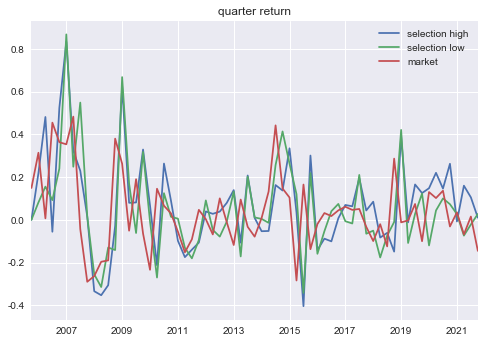

In [1281]:
data_ret_df.plot()
plt.title('quarter return',fontsize=fontsize)

Text(0.5, 1.0, 'net values')

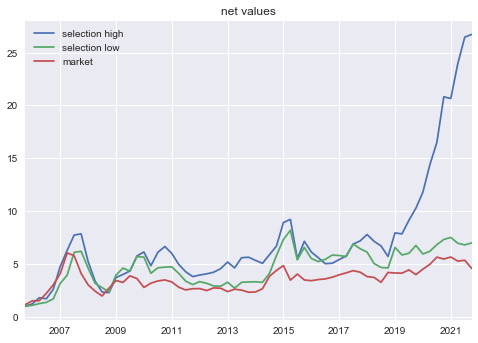

In [1282]:
net_value_df.plot()
plt.title('net values',fontsize=fontsize)

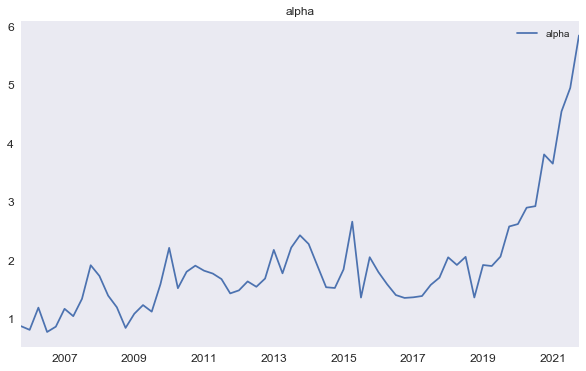

In [1283]:
(net_value_df['selection high'] / net_value_df['market']).plot(kind='line',secondary_y=['alpha'],figsize = figsize,fontsize=fontsize)
plt.title('alpha',fontsize=fontsize)
plt.legend(['alpha'])

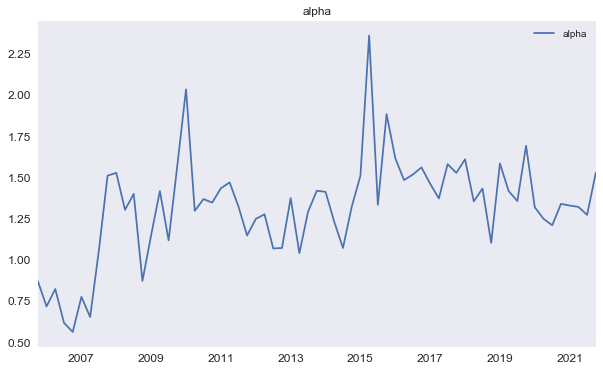

In [1284]:
(net_value_df['selection low'] / net_value_df['market']).plot(kind='line',secondary_y=['alpha'],figsize = figsize,fontsize=fontsize)
plt.title('alpha',fontsize=fontsize)
plt.legend(['alpha'])

In [1285]:
# 绩效指标
columns = ['净值','年化收益率 % ','最大回撤 % ','夏普率','年化波动率']
# 创建表格
finace_ret_df = pd.DataFrame(columns = columns)
# 再次定义函数：计算最大回撤
def maxdrawdown(arr):
    '''
    输入：净值序列
    输出：最大回撤
    '''
    # 最大回撤结束点
    i = np.argmax((np.maximum.accumulate(arr) - arr)/np.maximum.accumulate(arr))
    # 开始点
    j = np.argmax(arr[:i]) # start of period
    # 输出回撤值
    return (1-arr[i]/arr[j])

# 设置函数：计算净值曲线的绩效指标
def get_Performance_analysis(T,benchmark,year_day = 4):
    '''
    输入：净值序列 和基准净值序列
    
    输出：绩效指标
    '''
    # 如果基准净值序列长度为0 
    if len(benchmark) == 0:
        # 基准序列等于策略净值序列
        benchmark = T 
    
    # 获取最终净值
    net_values = round(T[-1],4)
    # 计算算术年化收益率
    year_ret_mean = T.pct_change().dropna().mean()*year_day
    year_ret_mean = round(year_ret_mean*100,2)
    
    # 计算几何年化收益率
    year_ret_sqrt = net_values**(year_day/len(T))-1
    year_ret_sqrt = round(year_ret_sqrt*100,2)
    
    # 计算年化波动率
    volitiy = T.pct_change().dropna().std()*np.sqrt(year_day)
    volitiy = round(volitiy*100,2)
    
    #计算夏普，无风险收益率记3%
    Sharpe = (year_ret_sqrt - 3)/volitiy
    Sharpe = round(Sharpe,2)

    # 计算超额收益率
    alpha = T[-1]/benchmark[-1]-1
    alpha = round(alpha*100,2)

    # 计算最大回撤
    downlow = maxdrawdown(T)
    downlow = round(downlow*100,2)
    
    # 输出
    return [net_values,year_ret_sqrt,downlow,Sharpe,volitiy]

# 调用绩效分析函数
finace_ret_df.loc['selection high'] = get_Performance_analysis(net_value_df['selection high'],[])
finace_ret_df.loc['selection low'] = get_Performance_analysis(net_value_df['selection low'],[])

finace_ret_df.loc['bench mark'] = get_Performance_analysis(net_value_df["market"],[])
finace_ret_df

,净值,年化收益率 %,最大回撤 %,夏普率,年化波动率
selection high,26.7261,22.41,70.95,0.44,44.45
selection low,6.9893,12.71,61.85,0.23,43.13
bench mark,4.5726,9.81,67.43,0.19,35.12


# 模型检验与修正

## 多重共线性的检验

In [1286]:
#相关系数
Corr = daily_basic.loc[:,['dv_ratio','mtm6','roe','op_yoy']]

In [1287]:
Corr.corr()

,dv_ratio,mtm6,roe,op_yoy
dv_ratio,1.000000,-0.156996,-0.015851,-0.024841
mtm6,-0.156996,1.000000,0.019968,0.028800
roe,-0.015851,0.019968,1.000000,0.040300
op_yoy,-0.024841,0.028800,0.040300,1.000000


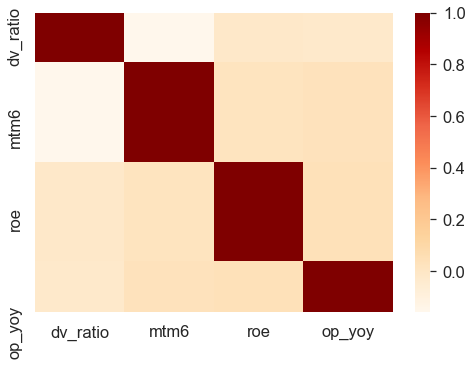

In [1288]:
sns.set(font_scale=1.5)
plt.rc('font',size=12)
sns.heatmap(Corr.corr(),cmap="OrRd")

并未有两两因子间出现较高的相关系数，说明该多元回归模型没有多重共线性，也证明最初的多因子模型无冗杂因子。

## Alpha策略    
为了进一步检验多因子模型的有效性，本文还将进行多因子模型与Alpha策略的对比，构建Alpha策略组合的具体操作是：确定Alpha策略形成期和持仓期两个参数，选择一个交易日作为计算点，对股票池中的组合在计算点之前的形成期内的数据进行计算分析，挑选出超额收益最大的组合进行持有；在持有持仓期之后，再重新计算选择组合进行持有，如此反复进行一直持续到2022年4月。

In [1289]:
market_close['date'] = market_close.index
market_close.drop(['close','lr','Unnamed: 0','code'],axis=1,inplace=True)
market_close.rename(columns={'change':"market",'next quarter ret':"next market"}, inplace = True)

In [1290]:
market_close['number'] = range(len(market_close))
market_close.set_index('number',inplace=True)

In [1291]:
daily_basic['date'] = daily_basic.index
daily_basic['number'] = range(len(daily_basic))
daily_basic.set_index('number',inplace=True)

In [1292]:
alpha_data =pd.merge(daily_basic,market_close)
alpha_data.set_index(['date'],inplace = True)

In [1293]:
alpha_data

,code,yearmonth,close,change,dv_ratio,mtm6,roe,op_yoy,next quarter ret,market,next market
date,,,,,,,,,,,
2005-12-31,000001.SZ,200512,6.14,0.065972,0.0000,0.035413,6.3868,25.3895,0.037459,0.006605,0.149046
2005-12-31,600079.SH,200512,3.07,-0.003247,1.6287,-0.072508,9.2267,45.2856,0.061889,0.006605,0.149046
2005-12-31,000157.SZ,200512,6.41,0.000000,0.9000,0.040584,18.5236,-18.5090,0.471139,0.006605,0.149046
2005-12-31,000768.SZ,200512,4.58,0.211640,0.0000,0.563140,2.0389,56.2685,-0.061135,0.006605,0.149046
2005-12-31,600299.SH,200512,13.07,0.261583,4.5907,0.519767,22.0840,121.4751,0.322112,0.006605,0.149046
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,600030.SH,202112,26.41,0.044699,1.8932,0.058941,11.8192,57.1136,NaN,0.015204,-0.145288
2021-12-31,601939.SH,202112,5.86,-0.018425,5.4608,-0.118797,12.2152,12.3145,NaN,0.015204,-0.145288
2021-12-31,601318.SH,202112,50.41,0.042390,4.1389,-0.215775,12.9042,-25.8194,NaN,0.015204,-0.145288


In [1294]:
grps = alpha_data.groupby(['code'])
grps

In [1295]:
###求alpha,窗口为一年
df_alpha = pd.DataFrame()
for fid,grp in grps:
    rt = grp.loc[:, 'change']
    net_value_rt = pd.DataFrame(rt)
    net_value_rt = net_value_rt.sort_index()
    net_value_rt['1rt'] = net_value_rt['change'].shift(1)
    net_value_rt['2rt'] = net_value_rt['change'].shift(2)
    net_value_rt['3rt'] = net_value_rt['change'].shift(3)
    net_value_rt['4rt'] = net_value_rt['change'].shift(4)
    net_value_rt['5rt'] = net_value_rt['change'].shift(5)
    net_value_rt['6rt'] = net_value_rt['change'].shift(6)
    net_value_rt['net_rt'] = 1+net_value_rt['1rt']+net_value_rt['2rt']+net_value_rt['3rt']+net_value_rt['4rt']
    rm = grp.loc[:, 'market']
    net_value_rm = pd.DataFrame(rm)
    net_value_rm = net_value_rm.sort_index()
    net_value_rm['1rt'] = net_value_rm['market'].shift(1)
    net_value_rm['2rt'] = net_value_rm['market'].shift(2)
    net_value_rm['3rt'] = net_value_rm['market'].shift(3)
    net_value_rm['4rt'] = net_value_rm['market'].shift(4)
    net_value_rm['5rt'] = net_value_rm['market'].shift(5)
    net_value_rm['6rt'] = net_value_rm['market'].shift(6)
    net_value_rm['net_rm'] = 1+net_value_rm['1rt']+net_value_rm['2rt']+net_value_rm['3rt']+net_value_rm['4rt']
    alpha = net_value_rt['net_rt']/net_value_rm['net_rm']
    alpha = pd.DataFrame(alpha)
    alpha['code'] = fid
    df_alpha = df_alpha.append(alpha)
df_alpha.rename(columns={0:"alpha"}, inplace = True)
df_alpha
    


,alpha,code
date,,
2005-12-31,NaN,000001.SZ
2006-03-31,NaN,000001.SZ
2006-06-30,NaN,000001.SZ
2006-09-30,NaN,000001.SZ
2006-12-31,0.927898,000001.SZ
...,...,...
2020-12-31,0.883714,603993.SH
2021-03-31,1.221062,603993.SH
2021-06-30,1.194693,603993.SH


In [1296]:
alpha_data['date'] = alpha_data.index
alpha_data['index'] = range(len(alpha_data))
alpha_data.set_index(['index'],inplace = True)
df_alpha['date'] = df_alpha.index
df_alpha['index'] = range(len(df_alpha))
df_alpha.set_index(['index'],inplace = True)

In [1297]:
alpha_data

,code,yearmonth,close,change,dv_ratio,mtm6,roe,op_yoy,next quarter ret,market,next market,date
index,,,,,,,,,,,,
0,000001.SZ,200512,6.14,0.065972,0.0000,0.035413,6.3868,25.3895,0.037459,0.006605,0.149046,2005-12-31
1,600079.SH,200512,3.07,-0.003247,1.6287,-0.072508,9.2267,45.2856,0.061889,0.006605,0.149046,2005-12-31
2,000157.SZ,200512,6.41,0.000000,0.9000,0.040584,18.5236,-18.5090,0.471139,0.006605,0.149046,2005-12-31
3,000768.SZ,200512,4.58,0.211640,0.0000,0.563140,2.0389,56.2685,-0.061135,0.006605,0.149046,2005-12-31
4,600299.SH,200512,13.07,0.261583,4.5907,0.519767,22.0840,121.4751,0.322112,0.006605,0.149046,2005-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...
12869,600030.SH,202112,26.41,0.044699,1.8932,0.058941,11.8192,57.1136,NaN,0.015204,-0.145288,2021-12-31
12870,601939.SH,202112,5.86,-0.018425,5.4608,-0.118797,12.2152,12.3145,NaN,0.015204,-0.145288,2021-12-31
12871,601318.SH,202112,50.41,0.042390,4.1389,-0.215775,12.9042,-25.8194,NaN,0.015204,-0.145288,2021-12-31


In [1298]:
daily_basic = pd.merge(alpha_data,df_alpha,on=['code','date'],how='inner')
daily_basic.set_index(['date'],inplace = True)
daily_basic.dropna(inplace = True)
daily_basic

,code,yearmonth,close,change,dv_ratio,mtm6,roe,op_yoy,next quarter ret,market,next market,alpha
date,,,,,,,,,,,,
2006-12-31,600655.SH,200612,11.74,0.233193,1.0221,0.144250,11.0539,95.7016,0.463373,0.454499,0.362920,1.144196
2006-12-31,000786.SZ,200612,4.53,-0.081136,1.1038,-0.132184,10.0977,89.2962,0.971302,0.454499,0.362920,0.844226
2006-12-31,600009.SH,200612,18.91,0.362392,0.5288,0.312283,15.7137,8.9996,0.288736,0.454499,0.362920,0.636261
2006-12-31,600872.SH,200612,2.96,-0.042071,0.0000,-0.089231,2.3324,39.0351,0.939189,0.454499,0.362920,0.789316
2006-12-31,600584.SH,200612,9.99,0.092998,0.5005,0.225767,12.1465,49.8071,0.249249,0.454499,0.362920,1.004420
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,601998.SH,202109,4.56,-0.105882,5.2415,-0.163303,7.2097,12.6960,0.013158,-0.068464,0.015204,0.801449
2021-12-31,600705.SH,202112,3.97,0.036554,2.6184,0.025840,11.2192,8.7795,0.036554,0.015204,-0.145288,0.810522
2021-12-31,600705.SH,202112,3.97,0.036554,2.6184,0.025840,11.2192,8.7795,0.036554,0.015204,-0.145288,0.954417


In [1299]:
trade_date = daily_basic.index.unique()

In [1300]:
start = trade_date[0]
end = trade_date[-1]
start,end

(Timestamp('2006-12-31 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [1301]:
datelist = list(trade_date.strftime('%Y%m%d'))
quarter_list = []
for s in range(1,len(datelist)):
    if datelist[s-1][4:6] != datelist[s][4:6]:
        quarter_list.append(datelist[s])

In [1302]:
quarter_list = pd.to_datetime(datelist)

In [1303]:
len(quarter_list)

61

In [1304]:
def get_index_stocks(daily_basic,quarter):
    # 获取某个时间点的所有成分股
    stock_pool = daily_basic.loc[quarter]["code"]
    return stock_pool

In [1305]:
t1,t2 = quarter_list[0],quarter_list[4]

In [1306]:
stock_pool = get_index_stocks(daily_basic,t1)

In [1307]:
len(stock_pool)

86

In [1308]:
stock_pool

date
2006-12-31    600655.SH
2006-12-31    000786.SZ
2006-12-31    600009.SH
2006-12-31    600872.SH
2006-12-31    600584.SH
                ...    
2006-12-31    600760.SH
2006-12-31    600741.SH
2006-12-31    600660.SH
2006-12-31    600115.SH
2006-12-31    600233.SH
Name: code, Length: 86, dtype: object

In [1309]:
# 获取因子数据
def get_fundamentals(quarter):
    # 获取季初时间点所有股票的股息率数据
    df = daily_basic.loc[quarter,["code","next quarter ret",'alpha','change']]
    # 更换index
    df.index = df["code"]
    return df

In [1310]:
rundf=get_fundamentals(t1).dropna()
rundf

,code,next quarter ret,alpha,change
code,,,,
600655.SH,600655.SH,0.463373,1.144196,0.233193
000786.SZ,000786.SZ,0.971302,0.844226,-0.081136
600009.SH,600009.SH,0.288736,0.636261,0.362392
600872.SH,600872.SH,0.939189,0.789316,-0.042071
600584.SH,600584.SH,0.249249,1.004420,0.092998
...,...,...,...,...
600760.SH,600760.SH,1.004854,0.659224,0.019802
600741.SH,600741.SH,1.005525,0.543677,0.222973
600660.SH,600660.SH,0.272850,0.926833,0.862547


In [1311]:
get_fundamentals(t2).dropna()

,code,next quarter ret,alpha,change
code,,,,
600011.SH,600011.SH,-0.389076,0.943941,-0.148680
000860.SZ,000860.SZ,-0.164522,0.887523,-0.016511
000895.SZ,000895.SZ,-0.364299,1.719468,0.162365
000568.SZ,000568.SZ,-0.156463,1.046415,0.174121
000651.SZ,000651.SZ,-0.090375,1.205803,0.145543
...,...,...,...,...
600118.SH,600118.SH,-0.450455,0.627332,-0.010805
600521.SH,600521.SH,-0.130841,0.627860,0.091837
000786.SZ,000786.SZ,-0.094660,0.839479,0.013946


In [1312]:
# 创建数据字典
data_dict = {}
# 获取本次研究所需要的股息率数据
for s in range(len(quarter_list)-1):
    # 当前初始
    quarter = quarter_list[s]
    # 下期截止
    quarter_next = quarter_list[s+1]
    # 动态进度
    print('\r 当前：{} --> 总量：{}'.format(quarter,quarter_list[-1]),end='')
    # 获取quarter开始的股息率
    df = get_fundamentals(quarter).dropna()

    # 储存
    data_dict[quarter] = df

 当前：2021-09-30 00:00:00 --> 总量：2021-12-31 00:00:00

In [1313]:
data_ret_df = pd.DataFrame(columns = ['selection high',"selection low"],dtype=object)

# 初始为0
data_ret_df.loc[quarter_list[0]] = 0
# 循环全周期
for s in range(len(quarter_list)-1):
    # 当期初始
    quarter = quarter_list[s]
    # 下期截止
    quarter_next = quarter_list[s+1]
    
    # 复制数据表data_dict[quarter]
    lsdf = data_dict[quarter].copy()
    lsdf = lsdf.sort_index()
    # 筛选
    lsdf_high = lsdf.sort_values(by='alpha',ascending = True).iloc[:int(len(lsdf)*0.1)]
    lsdf_low = lsdf.sort_values(by='alpha',ascending = True).iloc[int(len(lsdf)*0.9):]
    
    # 计算收益率均值
    data_ret_df.loc[quarter_next,["selection high"]] = lsdf_high.mean()['next quarter ret']  # 资金等额分配到选出的股票池中
    data_ret_df.loc[quarter_next,["selection low"]] = lsdf_low.mean()['next quarter ret']  # 资金等额分配到选出的股票池中

C:\Users\24670\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\24670\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [1314]:
data_ret_df = data_ret_df.sort_index()
data_ret_df

,selection high,selection low
2006-12-31,0,0
2007-03-31,0.687611,0.950392
2007-06-30,0.139212,0.379275
2007-09-30,0.219729,0.34821
2007-12-31,0.104888,0.003939
...,...,...
2020-12-31,0.077484,0.098071
2021-03-31,0.002807,-0.057389
2021-06-30,-0.05002,0.311211
2021-09-30,-0.062228,-0.035351


In [1315]:
market_close = pd.read_csv("quatermarket.csv",index_col=["date"],parse_dates=True)
market_close['next quarter ret'] = market_close.groupby('code')['change'].shift(-1)

In [1316]:
market_close = market_close.drop(['2005-06-30','2005-09-30','2005-12-30','2006-03-31','2006-06-30','2006-09-29','2022-03-31'],axis=0)
market_close.index = quarter_list

In [1317]:
data_ret_df["market"] = market_close["next quarter ret"]

In [1318]:
data_ret_df = data_ret_df.drop('2006-12-31',axis=0)

In [1319]:
data_ret_df

,selection high,selection low,market
2007-03-31,0.687611,0.950392,0.353117
2007-06-30,0.139212,0.379275,0.482651
2007-09-30,0.219729,0.34821,-0.043459
2007-12-31,0.104888,0.003939,-0.289934
2008-03-31,-0.207079,-0.39705,-0.263475
2008-06-30,-0.321899,-0.262579,-0.196346
2008-09-30,-0.149797,-0.247929,-0.189840
2008-12-31,-0.012545,-0.100469,0.379633
2009-03-31,0.784272,0.346478,0.262656
2009-06-30,0.074518,0.07509,-0.051056


In [1320]:
net_value_df = (data_ret_df+1).cumprod()
net_value_df

,selection high,selection low,market
2007-03-31,1.687611,1.950392,1.353117
2007-06-30,1.922547,2.690126,2.006199
2007-09-30,2.344986,3.626854,1.919011
2007-12-31,2.590946,3.641142,1.362626
2008-03-31,2.054416,2.195426,1.003607
2008-06-30,1.393101,1.618953,0.806553
2008-09-30,1.184419,1.217567,0.653438
2008-12-31,1.16956,1.095239,0.901504
2009-03-31,2.086813,1.474716,1.138289
2009-06-30,2.242317,1.585453,1.080172


In [1321]:
figsize = (10,6)
fontsize=12

Text(0.5, 1.0, 'quarter return')

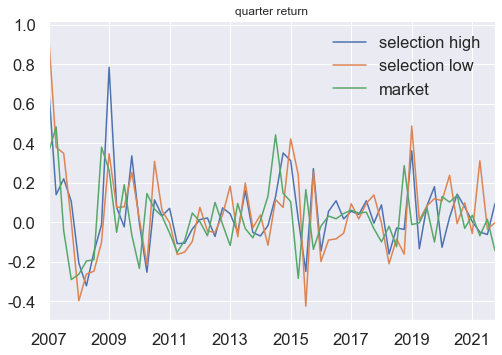

In [1322]:
data_ret_df.plot()
plt.title('quarter return',fontsize=fontsize)

Text(0.5, 1.0, 'net values')

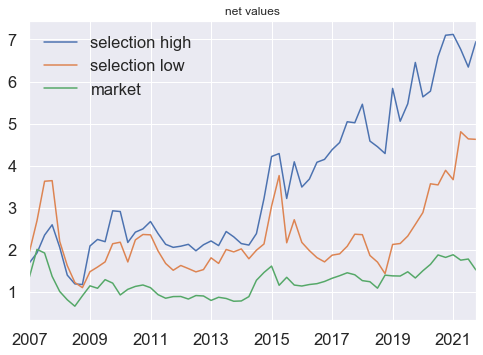

In [1323]:
net_value_df.plot()
plt.title('net values',fontsize=fontsize)

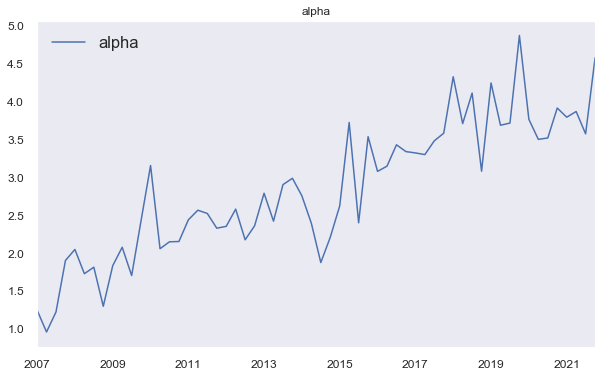

In [1324]:
(net_value_df['selection high'] / net_value_df['market']).plot(kind='line',secondary_y=['alpha'],figsize = figsize,fontsize=fontsize)
plt.title('alpha',fontsize=fontsize)
plt.legend(['alpha'])

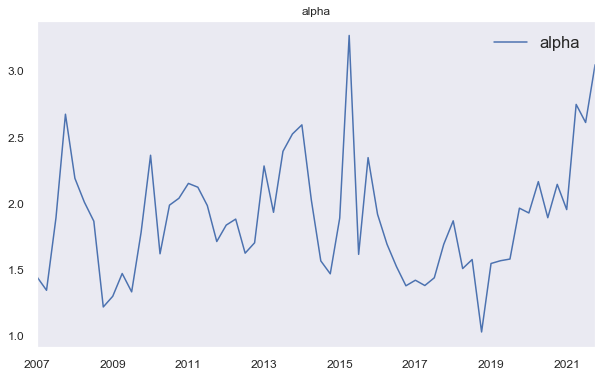

In [1325]:
(net_value_df['selection low'] / net_value_df['market']).plot(kind='line',secondary_y=['alpha'],figsize = figsize,fontsize=fontsize)
plt.title('alpha',fontsize=fontsize)
plt.legend(['alpha'])

In [1326]:
# 绩效指标
columns = ['净值','年化收益率 % ','最大回撤 % ','夏普率','年化波动率']
# 创建表格
finace_ret_df = pd.DataFrame(columns = columns)
# 再次定义函数：计算最大回撤
def maxdrawdown(arr):
    '''
    输入：净值序列
    输出：最大回撤
    '''
    # 最大回撤结束点
    i = np.argmax((np.maximum.accumulate(arr) - arr)/np.maximum.accumulate(arr))
    # 开始点
    j = np.argmax(arr[:i]) # start of period
    # 输出回撤值
    return (1-arr[i]/arr[j])

# 设置函数：计算净值曲线的绩效指标
def get_Performance_analysis(T,benchmark,year_day = 4):
    '''
    输入：净值序列 和基准净值序列
    
    输出：绩效指标
    '''
    # 如果基准净值序列长度为0 
    if len(benchmark) == 0:
        # 基准序列等于策略净值序列
        benchmark = T 
    
    # 获取最终净值
    net_values = round(T[-1],4)
    # 计算算术年化收益率
    year_ret_mean = T.pct_change().dropna().mean()*year_day
    year_ret_mean = round(year_ret_mean*100,2)
    
    # 计算几何年化收益率
    year_ret_sqrt = net_values**(year_day/len(T))-1
    year_ret_sqrt = round(year_ret_sqrt*100,2)
    
    # 计算年化波动率
    volitiy = T.pct_change().dropna().std()*np.sqrt(year_day)
    volitiy = round(volitiy*100,2)
    
    #计算夏普，无风险收益率记3%
    Sharpe = (year_ret_sqrt - 3)/volitiy
    Sharpe = round(Sharpe,2)

    # 计算超额收益率
    alpha = T[-1]/benchmark[-1]-1
    alpha = round(alpha*100,2)

    # 计算最大回撤
    downlow = maxdrawdown(T)
    downlow = round(downlow*100,2)
    
    # 输出
    return [net_values,year_ret_sqrt,downlow,Sharpe,volitiy]

# 调用绩效分析函数
finace_ret_df.loc['selection high'] = get_Performance_analysis(net_value_df['selection high'],[])
finace_ret_df.loc['selection low'] = get_Performance_analysis(net_value_df['selection low'],[])

finace_ret_df.loc['bench mark'] = get_Performance_analysis(net_value_df["market"],[])
finace_ret_df

,净值,年化收益率 %,最大回撤 %,夏普率,年化波动率
selection high,6.9459,13.79,54.86,0.31,34.86
selection low,4.6240,10.75,69.92,0.20,38.19
bench mark,1.5179,2.82,67.43,-0.01,31.65
